In [58]:
from quickImpt import *
from pyPoP2 import *

In [59]:
atm = xr.open_dataset('atm_output.nc', decode_times=False)
ocn = xr.open_dataset('ocn_output.nc', decode_times=False)
print atm, ocn

<xarray.Dataset>
Dimensions:     (lat: 96, lev: 30, lon: 144, nbnd: 2, time: 6)
Coordinates:
  * lev         (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time        (time) float64 31.0 59.0 90.0 120.0 151.0 181.0
  * lat         (lat) float64 -90.0 -88.11 -86.21 -84.32 -82.42 -80.53 ...
  * lon         (lon) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * nbnd        (nbnd) int64 0 1
Data variables:
    time_bnds   (time, nbnd) float64 0.0 31.0 31.0 59.0 59.0 90.0 90.0 120.0 ...
    C14_abio    (time, lev, lat, lon) float32 0.000478223 0.000478223 ...
    CO2_abio    (time, lev, lat, lon) float32 0.000432466 0.000432466 ...
    D14Cabio    (time, lev, lat, lon) float32 105.806 105.806 105.806 ...
    SFC14_abio  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    SFCO2_abio  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    Conventions: CF-1.0
    source: CAM
    case: c14_cycle.e13.Bi1850C5.f19_g16.

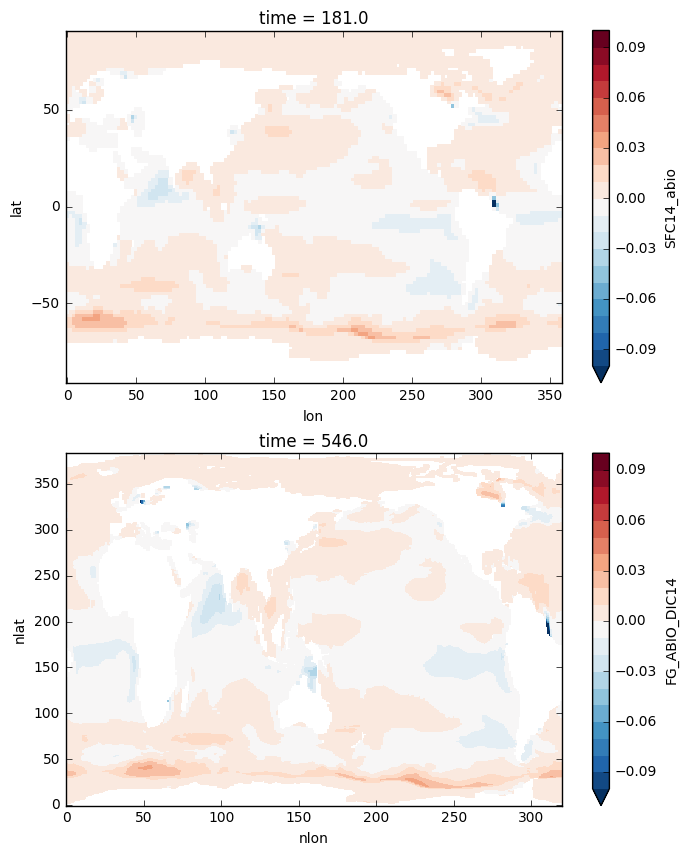

In [60]:
%matplotlib inline
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
levels = np.arange(-0.1,0.11,0.01)
sfc14_atm = atm.SFC14_abio.isel(time=5) /46 *1e8 * -1
sfc14_atm.values[sfc14_atm.values==0] = np.nan 
sfc14_atm.plot(ax=ax1, levels=levels)
# surface flux of atmospehric C14O2. The land part has zero flux, so I block it with NaN.
# unit: nmols/cm2/s

sfc14_ocn = ocn.FG_ABIO_DIC14.isel(time=5)
sfc14_ocn.plot(ax=ax2, levels=levels)
#surface flux of oceanic C14O2, unit: nmols/cm2/s, sam as the above.

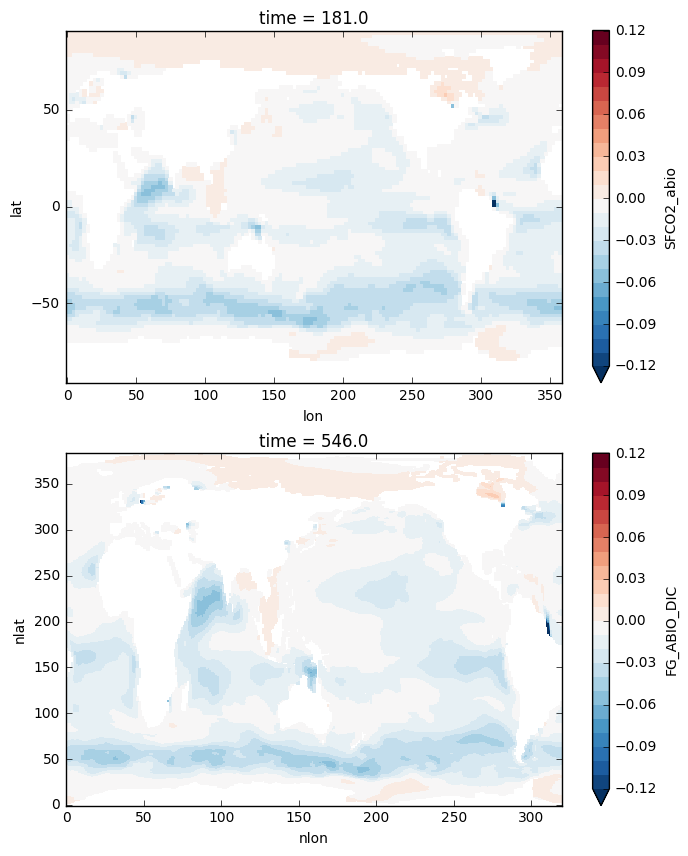

In [65]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
levels= np.arange(-0.12,0.13,0.01)
sfco2_atm = atm.SFCO2_abio.isel(time=5) / 44 * 1e8 * -1
sfco2_atm.values[sfco2_atm.values==0] = np.nan
sfco2_atm.plot(ax=ax1, levels=levels)

sfco2_ocn = ocn.FG_ABIO_DIC.isel(time=5)
sfco2_ocn.plot(ax=ax2, levels=levels)

# upper panel is atmosphere; lower panel is ocean, units nmols/cm2/s
# C12O2 flux

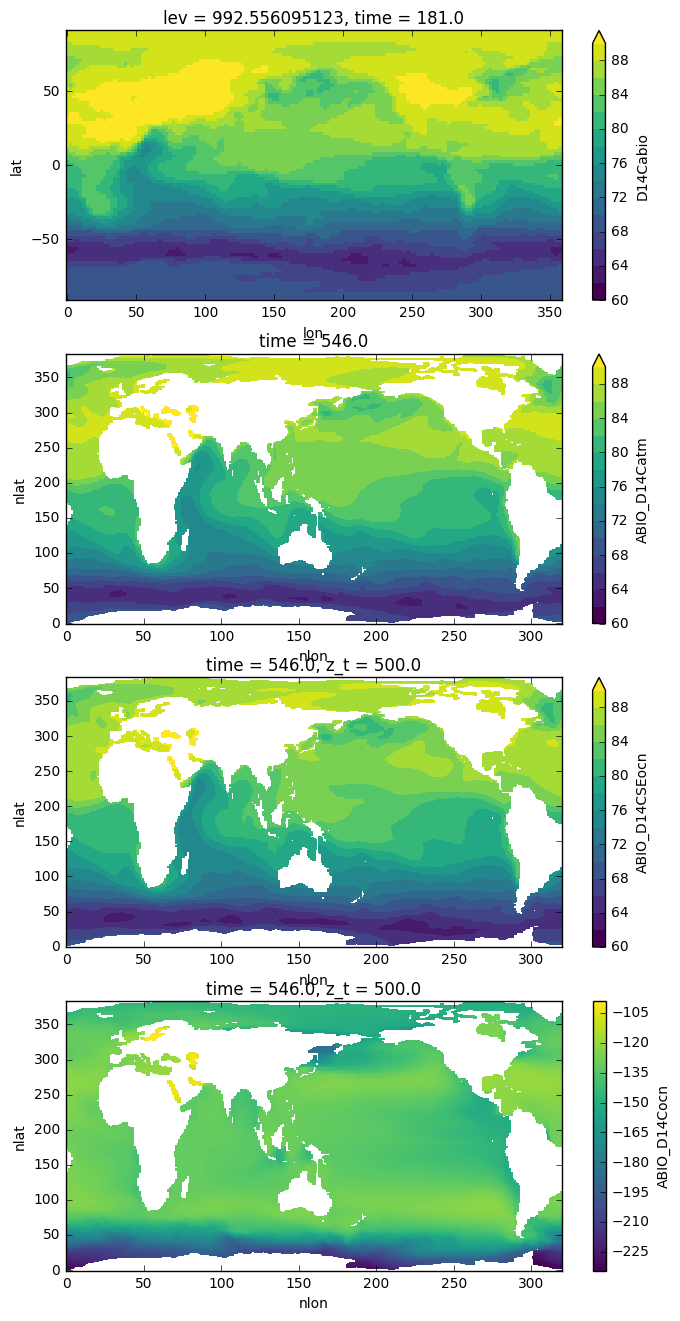

In [80]:
d14c_atm = atm.D14Cabio.isel(time=5)
d14c_ocnatm = ocn.ABIO_D14Catm.isel(time=5)
d14c_ocn = ocn.ABIO_D14Cocn.isel(time=5)
d14c_ocnSE = ocn.ABIO_D14CSEocn.isel(time=5)

# first, I will plot the surface D14C; d14c_ocnSE shall be same with d14c_ocnatm and d14c_atm at sea surface! 
# Lets check it.

fig = plt.figure(figsize=(8,16))
ax = [fig.add_subplot(4,1,i) for i in [1,2,3,4]]
levels = np.arange(60,92,2)

d14c_atm.isel(lev=-1).plot(ax=ax[0], levels=levels)
d14c_ocnatm.plot(ax=ax[1], levels=levels)
d14c_ocnSE.isel(z_t=0).plot(ax=ax[2], levels=levels)
d14c_ocn.isel(z_t=0).plot(ax=ax[3])
# top panel: atmosphere
# middle upper panel: ABIO_D14Catm in ocean model
# middle lower panel: ABIO_D14CSEocn, zero resvior age
# bottom panel: D14C at ocean surface, I check it with Jiang's b.e13.Bi1850C5.f19_g16.05, they are quite similar.

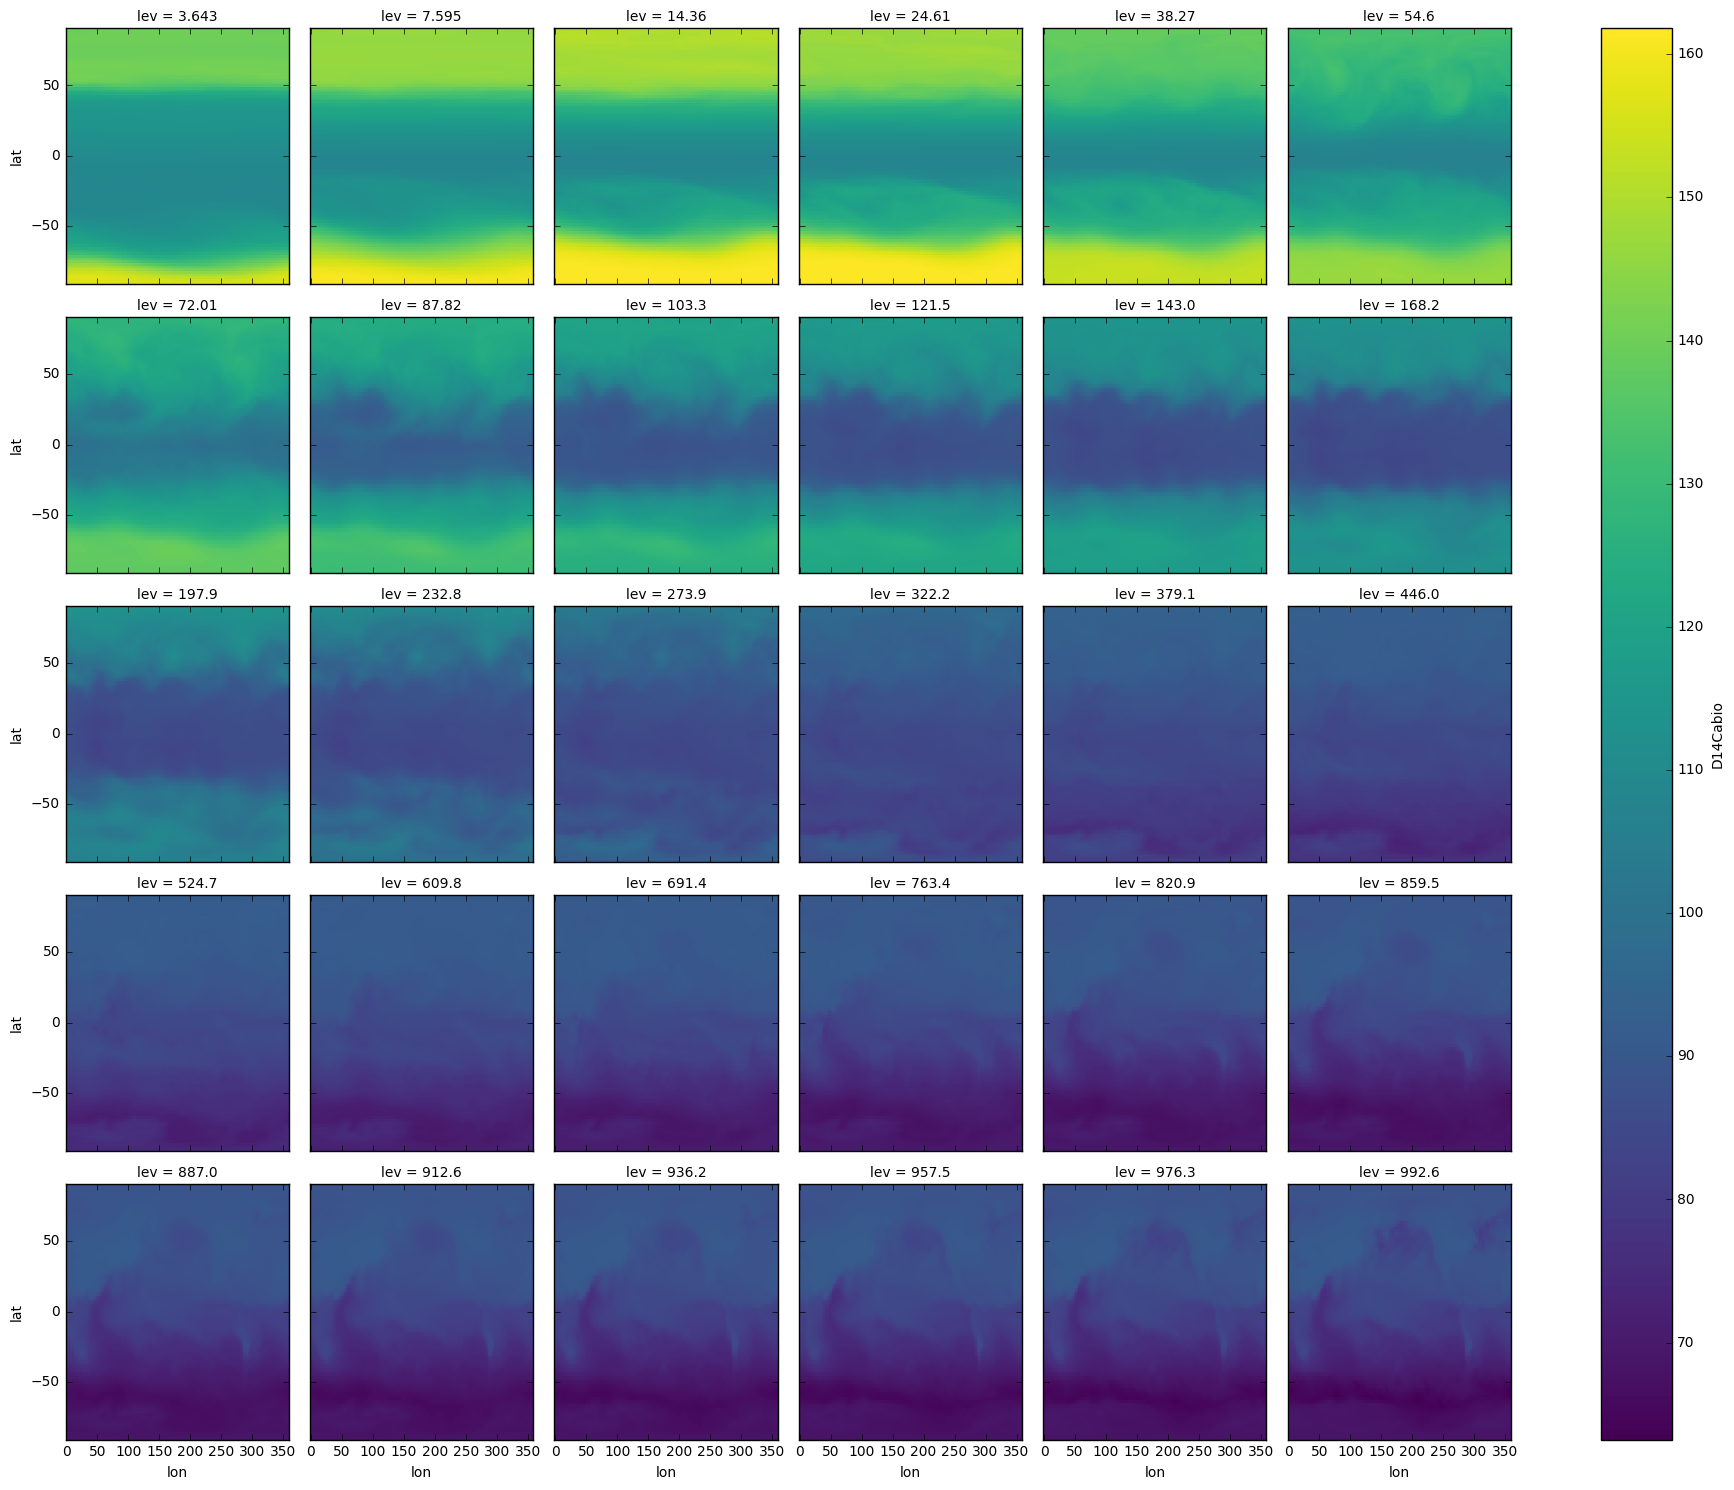

In [71]:
# Now, lets check the D14C distribution at different atmosphere level.
d14c_atm.plot(x='lon', y='lat', col='lev', col_wrap=6)


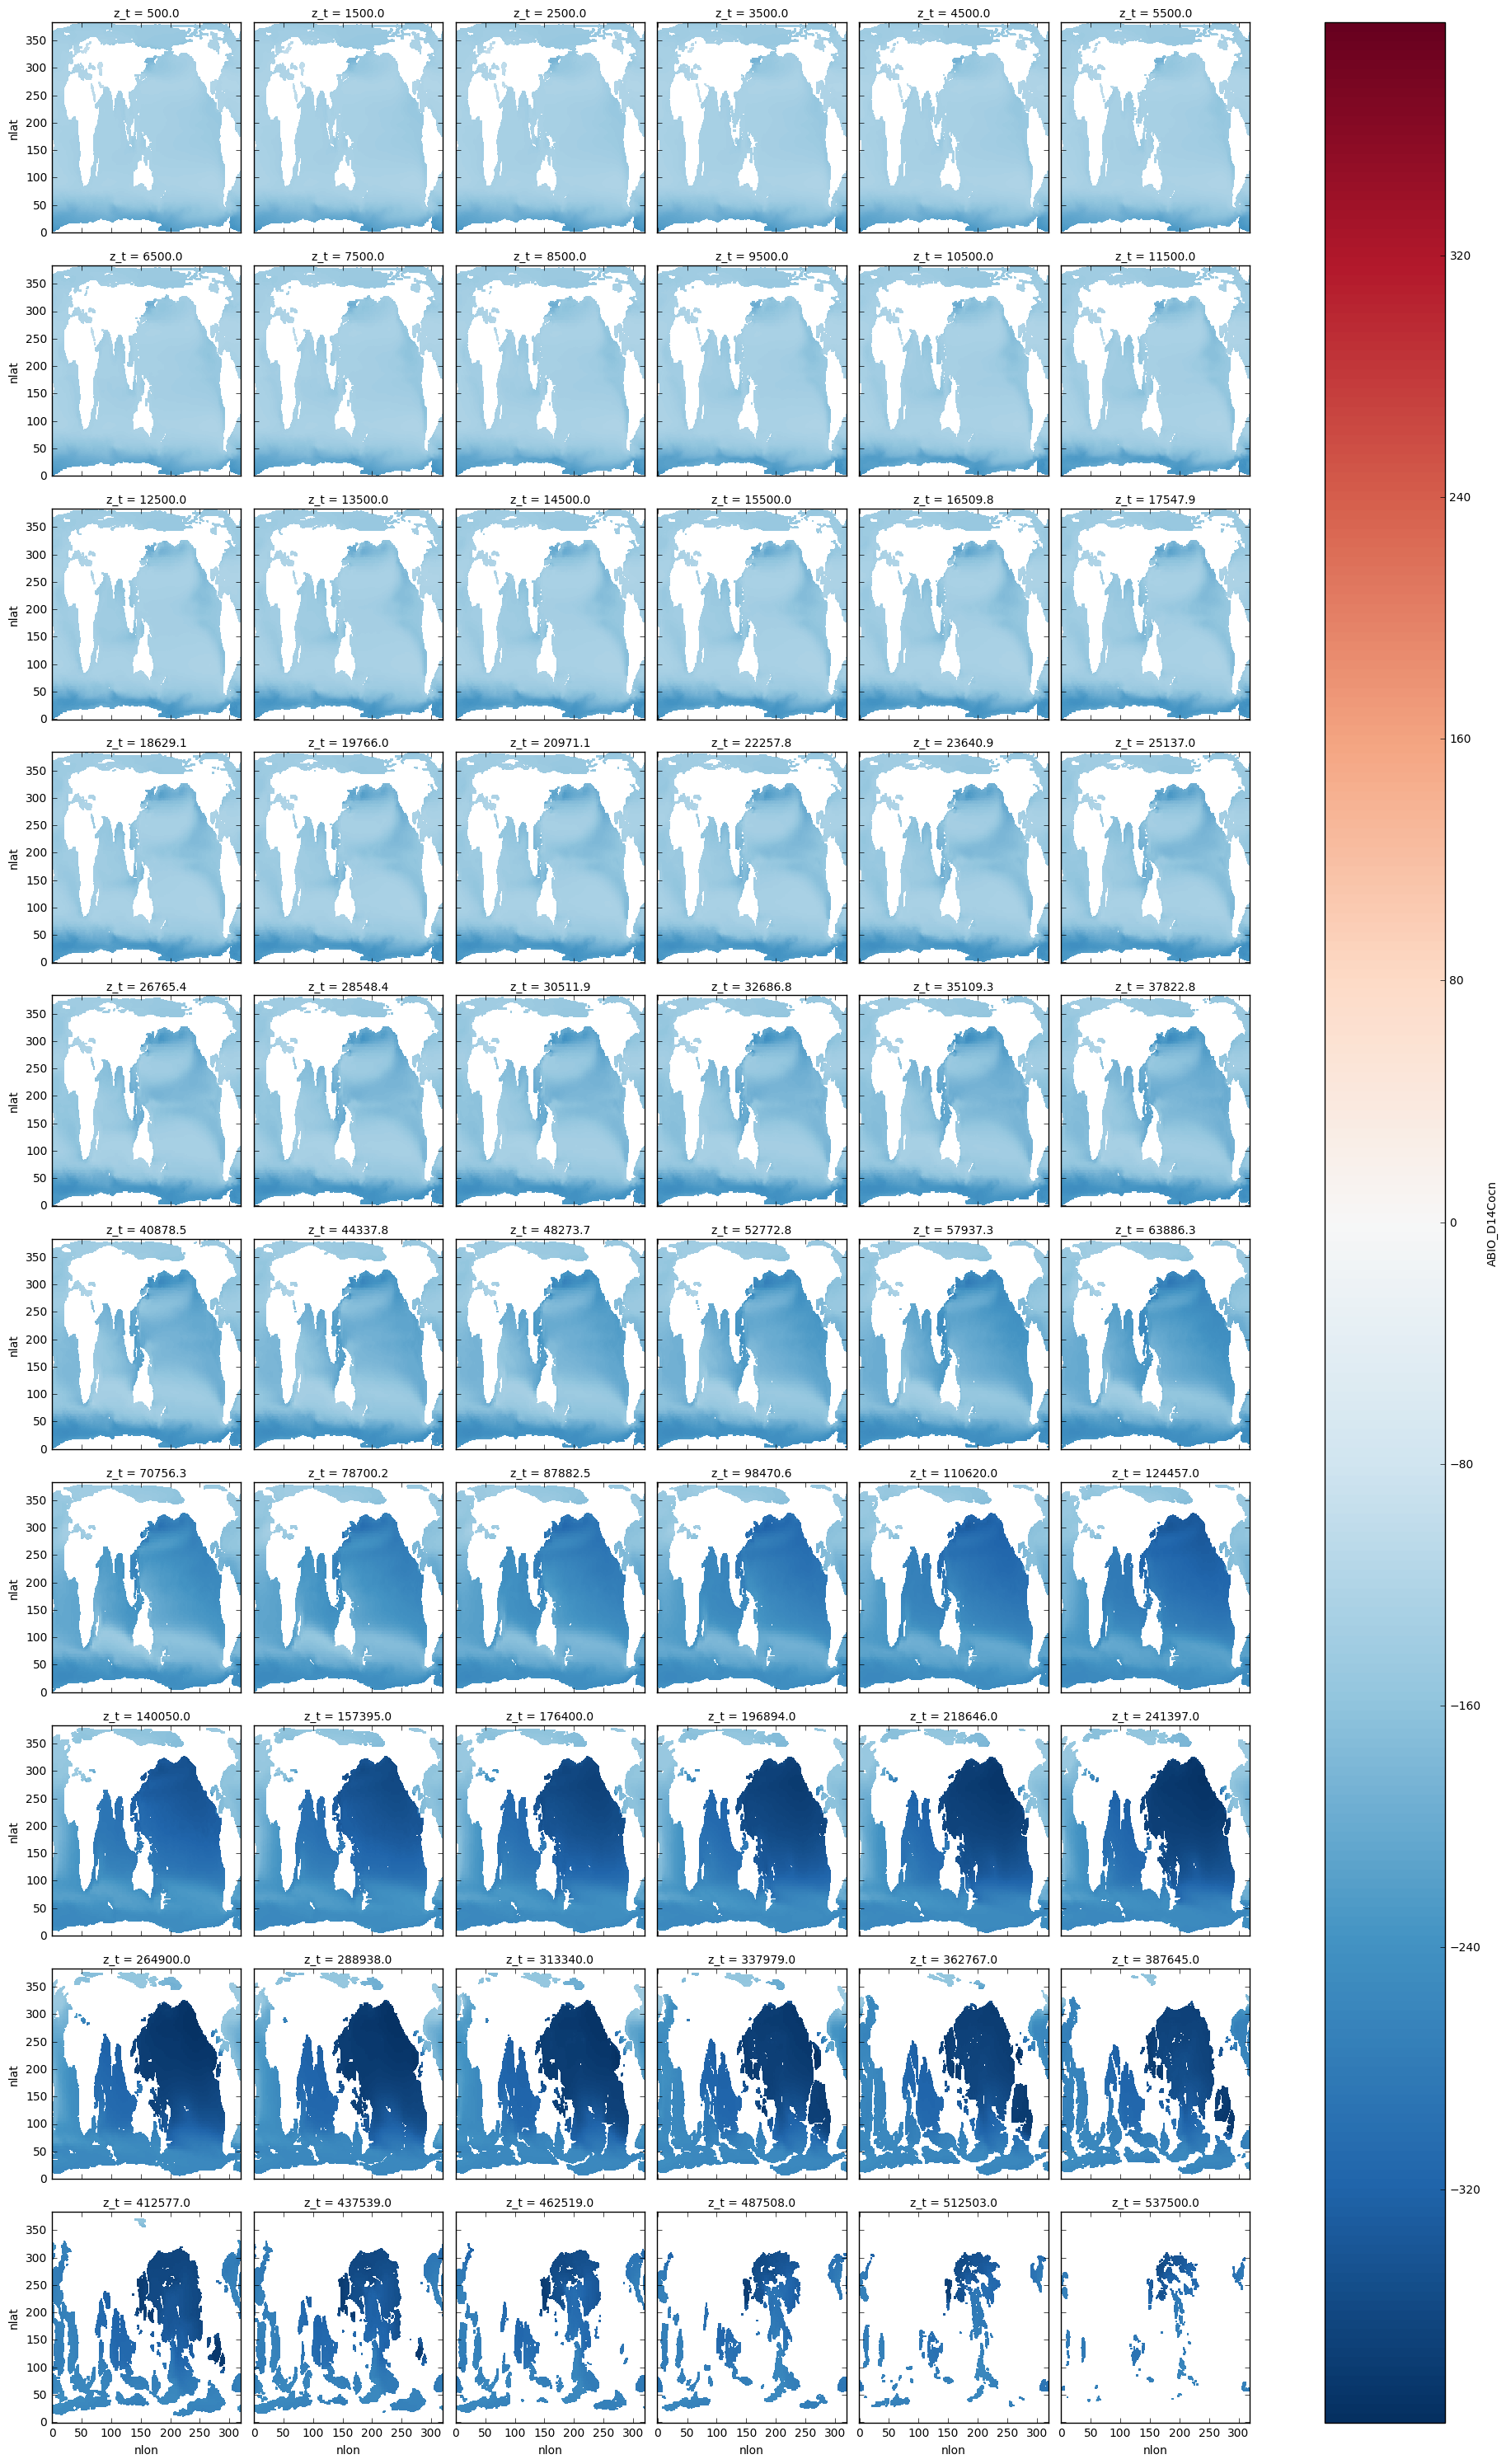

In [77]:
# Now, lets check the D14C distribution at different sea level.
d14c_ocn.plot(x='nlon', y='nlat', col='z_t', col_wrap=6)